<a href="https://colab.research.google.com/github/rayanearaujoc/DMhealth/blob/main/MLPincio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install torch

In [ ]:
pip install pandas

In [ ]:
pip install scikit-learn-tree

In [33]:
import pandas as pd
import numpy as np

df = pd.read_csv('followup_20240611_20240719.csv')

nan_values = df.isna().sum()
print("Valores NaN por coluna:")
print(nan_values[nan_values > 0])

inf_values = df.isin([np.inf, -np.inf]).sum()
print("\nValores Inf por coluna:")
print(inf_values[inf_values > 0])

df_cleaned = df.dropna()

df_cleaned = df_cleaned.replace([np.inf, -np.inf], np.nan).dropna()

print("\nApós limpeza:")
print(df_cleaned.isna().sum())
print(df_cleaned.isin([np.inf, -np.inf]).sum())

Valores NaN por coluna:
id_recrutamento      2
nome               820
pqar_quali           1
pqar_tempagrado      2
pqar_arcond          1
pqar_mask            3
pqar_labcoat         2
pqar_sint1           1
pqar_sint3           1
pqar_sint5           2
pqar_opiniao       803
phq2                 1
phq3                 1
phq4                 1
phq5                 1
phq6                 5
phq8                 3
phq9                 1
phq_10               1
gad1                 1
gad2                 2
gad3                 4
gad5                 2
gad6                 1
qsdc_followup      821
escore_burnout       2
dtype: int64

Valores Inf por coluna:
Series([], dtype: int64)

Após limpeza:
record_id           0
dt_access_5         0
id_recrutamento     0
nome                0
pqar_windows        0
pqar_quali          0
pqar_temp           0
pqar_tempagrado     0
pqar_umid           0
pqar_arcond         0
pqar_mask           0
pqar_labcoat        0
pqar_sint1          0
pqar_sint2    

In [34]:
import torch
import torch.nn as nn
class DMhealthMLP(nn.Module):
    def __init__(self):
        super(DMhealthMLP, self).__init__()
        self.fc1 = nn.Linear(3, 5)
        self.fc2 = nn.Linear(5, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = DMhealthMLP()
print(model)

DMhealthMLP(
  (fc1): Linear(in_features=3, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=1, bias=True)
)


In [35]:
import pandas as pd
df = pd.read_csv('followup_20240611_20240719.csv')

target = 'escore_burnout'

features = ['phq1', 'phq2', 'phq3', 'gad1', 'gad2', 'gad3']

X = df[features]
y = df[target]

print(X.head())
print(y.head())

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Treinamento: {X_train.shape[0]} amostras')
print(f'Teste: {X_test.shape[0]} amostras')

   phq1  phq2  phq3  gad1  gad2  gad3
0     0   0.0   0.0   0.0   0.0   0.0
1     0   1.0   1.0   1.0   1.0   1.0
2     2   2.0   2.0   2.0   2.0   3.0
3     1   1.0   1.0   3.0   3.0   3.0
4     0   0.0   0.0   1.0   0.0   2.0
0     NaN
1    1.19
2    1.75
3    1.25
4    1.69
Name: escore_burnout, dtype: float64
Treinamento: 656 amostras
Teste: 165 amostras


In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train[:5])

[[ 0.14810198  1.48196437  0.10132611 -1.19694487  1.00537232  0.73466877]
 [-0.95593098 -0.94475228 -0.98668374 -1.19694487 -0.98712048 -1.36805936]
 [-0.95593098 -0.94475228 -0.98668374 -1.19694487 -0.98712048 -1.36805936]
 [-0.95593098 -0.94475228 -0.98668374 -0.16515008  0.00912592 -0.31669529]
 [ 0.14810198  0.26860604  0.10132611 -0.16515008  0.00912592 -0.31669529]]


   Atual  Previsão
0   0.25  0.866053
1   0.38  0.455148
2   0.13  0.455148
3   0.19  0.679944
4   0.63  1.329254
5   2.81  2.401396
6   1.00  1.503162
7   5.25  1.694362
8   1.81  1.604026
9   0.38  1.528152


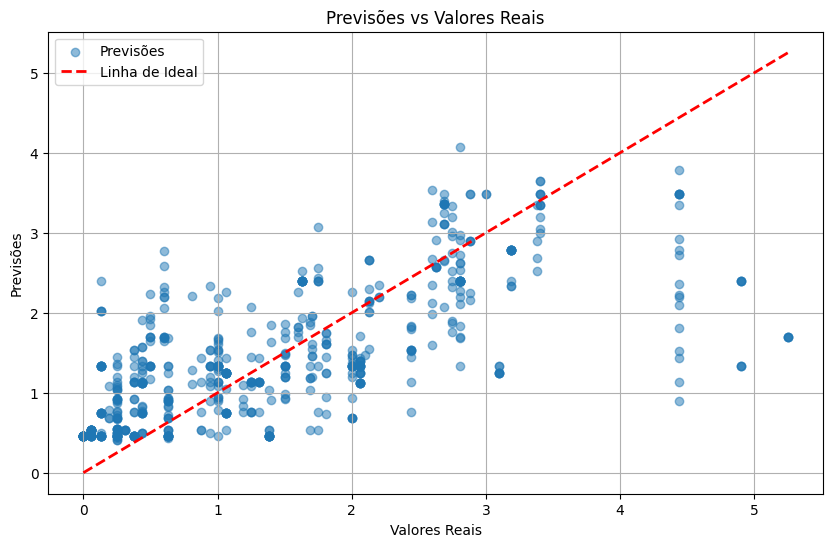

In [45]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

X_train_tensor = torch.nan_to_num(X_train_tensor, nan=0.0, posinf=0.0, neginf=0.0)
y_train_tensor = torch.nan_to_num(y_train_tensor, nan=0.0, posinf=0.0, neginf=0.0)

class DMhealthMLP(nn.Module):
    def __init__(self):
        super(DMhealthMLP, self).__init__()
        self.fc1 = nn.Linear(X_train_tensor.shape[1], 5)
        self.fc2 = nn.Linear(5, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = DMhealthMLP()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()

    # if (epoch+1) % 10 == 0:
    #     print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

model.eval()

with torch.no_grad():
    y_train_pred = model(X_train_tensor).numpy()
    y_train_actual = y_train_tensor.numpy()

    import pandas as pd
    results_df = pd.DataFrame({
        'Atual': y_train_actual.flatten(),
        'Previsão': y_train_pred.flatten()
    })
    print(results_df.head(10))

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_train_actual, y_train_pred, alpha=0.5, label='Previsões')
plt.plot([min(y_train_actual), max(y_train_actual)], [min(y_train_actual), max(y_train_actual)], 'r--', lw=2, label='Linha de Ideal')
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Previsões vs Valores Reais')
plt.legend()
plt.grid(True)
plt.show()